# Programming Assignment # Clustering

## Assignment Details

In this assignment you will learn about cluster using K-means clustering and Hierarchical Agglomerative clustering for predicted and actual values.

Each team will have a total of 3 .ipynb file. Each member will work on a different dataset.csv


You have 3 dataset files:-

1)DataSet_1

2)DataSet_2

3)DataSet_3

REPORT:

Make a 4-5 minutes video to explain what you have done and what did you learn from it. - 10 points

## Required Python Packages 

In [1]:
# Import required Python packages here
# Seaborn,numpy,pandas,sklearn,matplotlib only

!pip install numpy pandas matplotlib seaborn scikit-learn

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


## TASK 1: K-Means Clustering

### Task 1-a: Determine “k” value from the elbow method

In this task, you will be using the elbow method to determine the optimal number of clusters for k-means clustering.

For this task, you need to perform the elbow method for k from 1 to 10 and plot a line chart of the SSE for each value of k, and determine the best k (the number of clusters). Note that you need to use the whole dataset in this task and you need to print your decision for k.

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to su

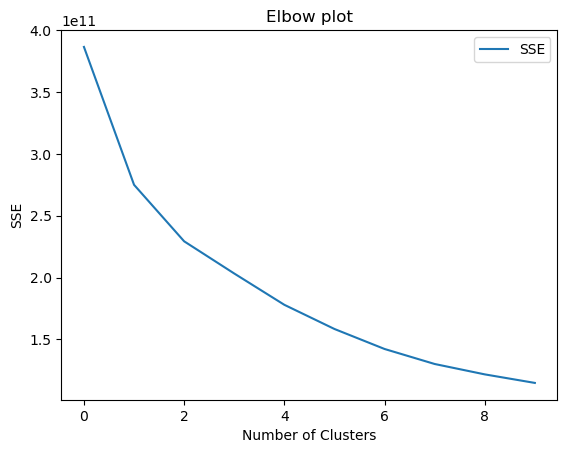

In [2]:
#########################begin code for Task 1-a - 10 Points
## Describe which is the optimal value for K and explain why you choose it as the optimal value

from sklearn.cluster import KMeans
data = pd.read_csv("DataSet_2.csv")

def fit_model(num_cluster):
    k_means_model = KMeans(n_clusters=num_cluster).fit(data.iloc[:, 1:-1].dropna())
    return k_means_model.inertia_

sse = []
for cluster in range(1,11):
    sse.append(fit_model(cluster))

plt.plot( sse, label="SSE") 
plt.xlabel('Number of Clusters') 
plt.ylabel('SSE')
plt.legend()
plt.title("Elbow plot")
plt.show()

### Task 1-b: Visualization for K-Means Clustering 

--> Performing k-means clustering for k=3,4,5 and visualize the predicted training samples and actual training samples on scatter plots. 

--> Use 75% of the dataset for training and 25% of the dataset for testing. Perform kmeans for clustering samples in your training set. 

--> Visualize predicted training samples and actual training samples on two scatter plots.Since your dataset has multiple features(dimensions), you won't be able to plot your data on a scatter plot. Thus, you’re going to visualize your data with the help of one of the Dimensionality Reduction techniques, namely Principal Component Analysis (PCA.You can easily apply PCA to your data with the help of scikit-learn.



In [3]:
###################begin code for Task 1-b-1: Split the datasetand set the random_state as 2021 without fail - 5 points
### Important!!!

data = data.dropna()
y = data.iloc[:, -1].copy()
y[y<12] = 0
y[y>=12] = 1

#test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:-1].values, y.values, test_size=0.25, random_state=2021)

###################end code for Task 1-b-1

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


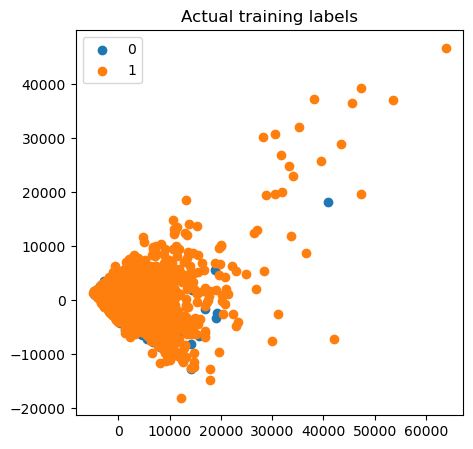

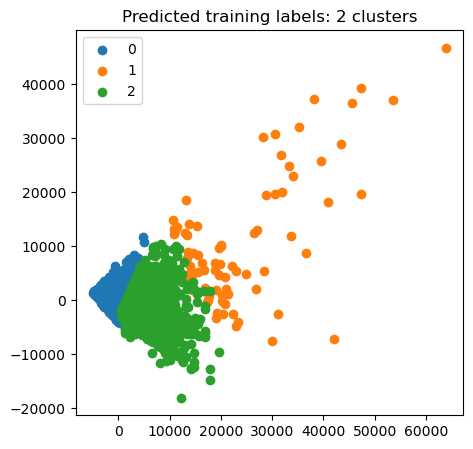

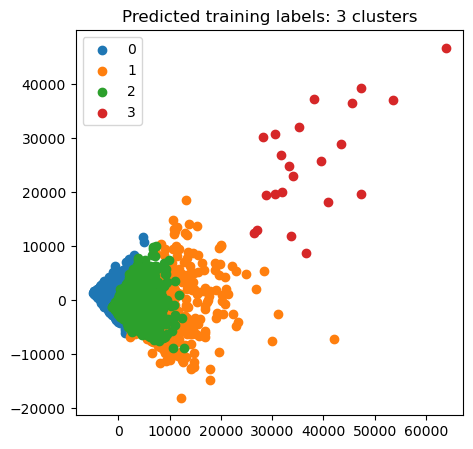

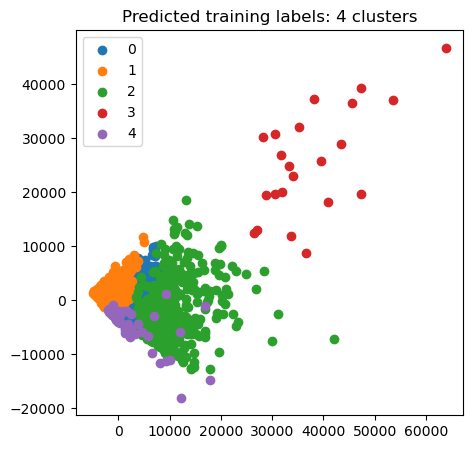

In [4]:

####Task 1-b-2: Visualize the predicted training labels vs actual training labels - 10 points
# Import PCA
from sklearn.decomposition import PCA

# Create the KMeans model

# Compute cluster centers and predict cluster index for each sample 

# Model and fit the data to the PCA model

# Visualize the predicted training labels vs actual training labels. 
### scatter(x, y, your_data)


## Visualize using K=3,4,5 as well
X_train_pca = PCA(n_components=2).fit_transform(X_train)

fig, ax = plt.subplots(figsize=(5,5))
for cluster in range(2):
    val=np.where(y_train == cluster)
    ax.scatter(X_train_pca[val,0], X_train_pca[val,1], label=str(cluster))
    ax.set_title("Actual training labels")
    ax.legend()

#create k-means model
for num_clusters in [3,4,5]:
    fig, ax = plt.subplots(figsize=(5,5))
    model = KMeans(n_clusters=num_clusters)
    y_pred = model.fit_predict(X_train)
    cluster_center = model.cluster_centers_
    for cluster in range(num_clusters):
        val=np.where(y_pred == cluster)
        ax.scatter(X_train_pca[val,0], X_train_pca[val,1], label=str(cluster))
        ax.set_title("Predicted training labels: " + str(cluster) + " clusters")
        ax.legend()
#####end Task 1-b-2


/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


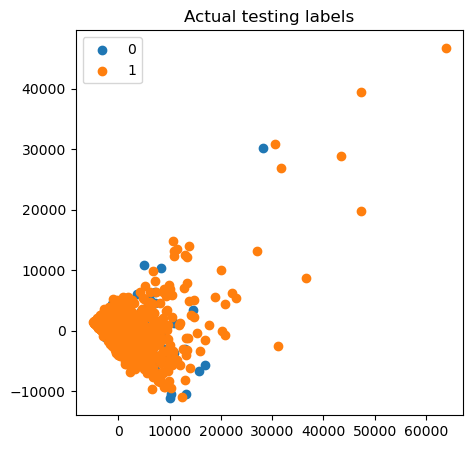

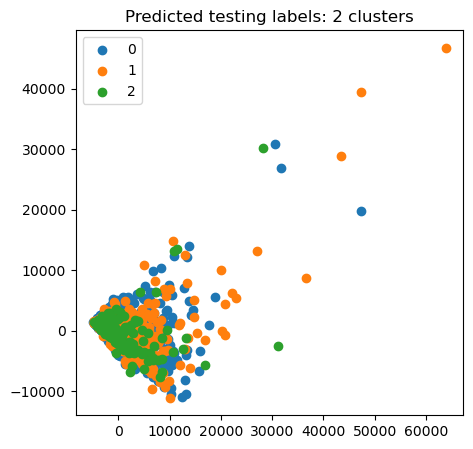

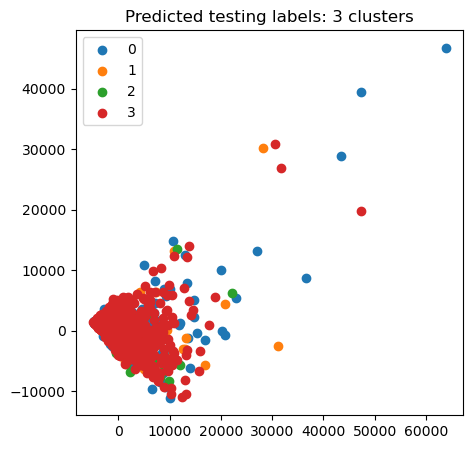

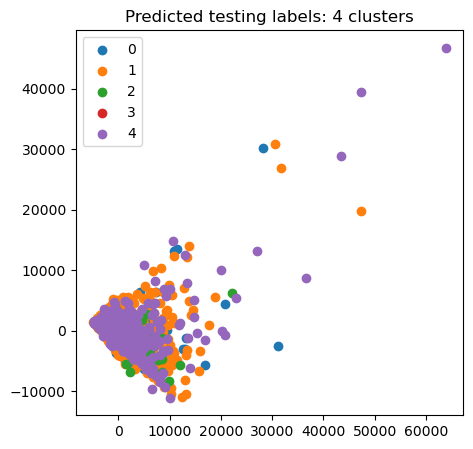

In [5]:
#### Task 1-b-3: Visualize the predicted testing labels vs actual testing labels - 10 Points

# predict cluster index for each sample 

# Model and fit the data to the PCA model

# Visualize the predicted testing labels vs actual testing labels. 
### scatter(x, y, your_data)

fig, ax = plt.subplots(figsize=(5,5))
for cluster in range(2):
    val=np.where(y_test == cluster)
    ax.scatter(X_train_pca[val,0], X_train_pca[val,1], label=str(cluster))
    ax.set_title("Actual testing labels")
    ax.legend()

#create k-means model
for num_clusters in [3,4,5]:
    fig, ax = plt.subplots(figsize=(5,5))
    model = KMeans(n_clusters=num_clusters)
    y_pred = model.fit_predict(X_test)
    cluster_center = model.cluster_centers_
    for cluster in range(num_clusters):
        val=np.where(y_pred == cluster)
        ax.scatter(X_train_pca[val,0], X_train_pca[val,1], label=str(cluster))
        ax.set_title("Predicted testing labels: " + str(cluster) + " clusters")
        ax.legend()
####end Task 1-b-3

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1500x1500 with 0 Axes>

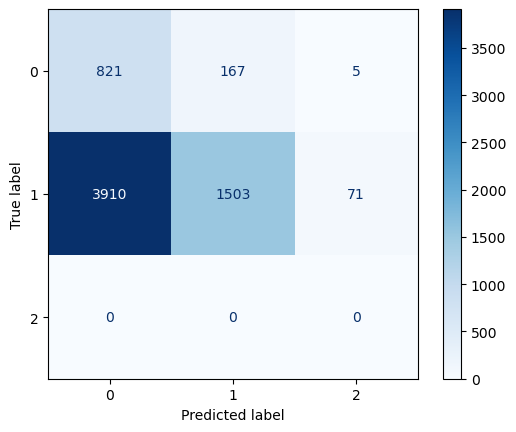

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1500x1500 with 0 Axes>

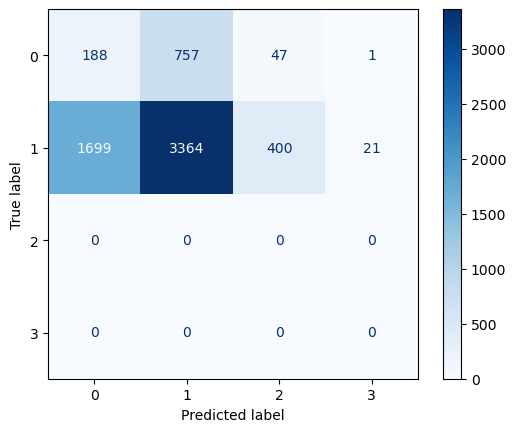

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 1500x1500 with 0 Axes>

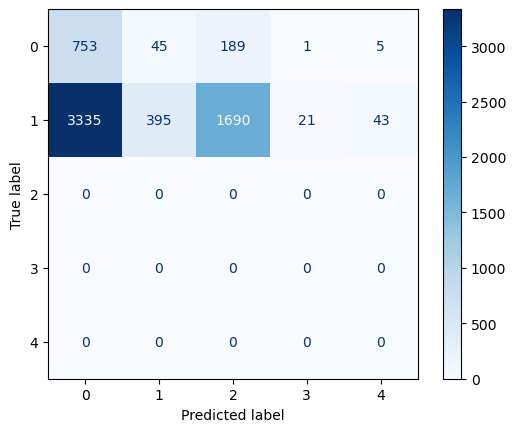

In [6]:
######Task 1-b-4: you need to provide the evaluation of your clustering model. 
#Print out a 2D confusion matrix and Print out a 2-D confusion matrix for all K values calculated above - 05 Points

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Done in previous cells
for num_clusters in [3,4,5]:
    model = KMeans(n_clusters=num_clusters)
    y_pred = model.fit_predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(num_clusters)))
    plt.figure(figsize=(5,5), dpi=300)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()
######end Task 1-b-4

## Task 2-a: Find the best Hierarchical Agglomerative Clustering Model
--> Perform Hierarchical Agglomerative clustering with different linkage methods for complete and average and different similarity measures for cosine, euclidean, and manhattan

--> Use F1 score for evaluation by taking number of clusters as 2.



In [7]:
from sklearn.cluster import AgglomerativeClustering

# Import pairwise_distances for calculating pairwise distance matrix
from sklearn.metrics.pairwise import pairwise_distances

# Import f1_score
from sklearn.metrics import f1_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler


MODEL = {}

link = ["complete","average"]
metrics = ["euclidean","cosine","manhattan"]

for l in link:
    MODEL[l] = {}

## GENERATE MODEL


for l in link:
    for m in metrics:
        MODEL[l][m] = AgglomerativeClustering(affinity=m, n_clusters = 2, linkage=l)

def ComputePairwiseDistances(X,m):
    return pairwise_distances(X,metric = m)

PAIR_DISTANCE = {}
for m in metrics:
    PAIR_DISTANCE[m] = ComputePairwiseDistances(X_train, m)
    
PREDICTION_ARRAY = {}

for l in link:
    PREDICTION_ARRAY[l] = {}

for l in link:
    for m in metrics:
        PREDICTION_ARRAY[l][m] = MODEL[l][m].fit_predict(X_train)

###
F1_SCORE = {}
for l in link:
    F1_SCORE[l] = {}

for l in link:
    for m in metrics:
        F1_SCORE[l][m] = max(f1_score(y_train,PREDICTION_ARRAY[l][m],average='weighted'),f1_score(y_train,np.where(PREDICTION_ARRAY[l][m]==0,1,0),average='weighted') )



## Print the 2-D confusion matrix with different linkage methods (complete and average) and different similarity measures (cosine, euclidean, and manhattan) 
##To find the best pair of linkage method and similarity measure. 

print("F1-score for complete linkage + cosine    : ", F1_SCORE['complete']['cosine'] )
print("F1-score for complete linkage + euclidean : ", F1_SCORE['complete']['euclidean'])
print("F1-score for complete linkage + manhattan : ", F1_SCORE['complete']['manhattan'])
print("F1-score for average linkage + cosine     : ", F1_SCORE['average']['cosine'])
print("F1-score for average linkage + euclidean  : ", F1_SCORE['average']['euclidean'])
print("F1-score for average linkage + manhattan  : ", F1_SCORE['average']['manhattan'])

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/

F1-score for complete linkage + cosine    :  0.7743679751034586
F1-score for complete linkage + euclidean :  0.7761663273983259
F1-score for complete linkage + manhattan :  0.7653849205997416
F1-score for average linkage + cosine     :  0.7650381803296555
F1-score for average linkage + euclidean  :  0.7761663273983259
F1-score for average linkage + manhattan  :  0.7763197070364237


Text(0.5, 1.0, 'Average')

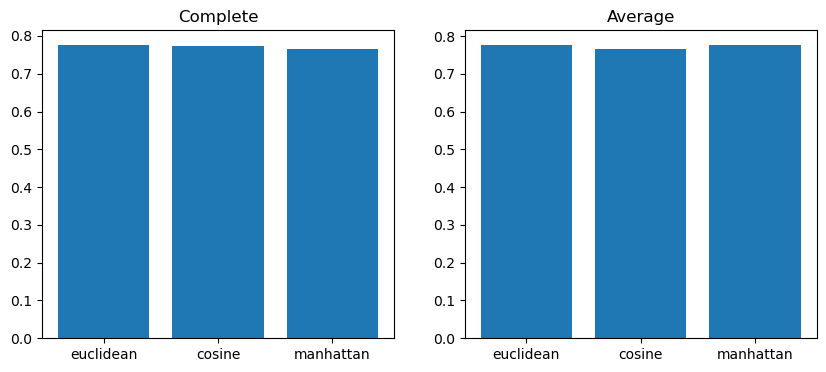

In [8]:
fig,ax = plt.subplots(1,2,figsize = (10,4))
ax[0].bar(list(F1_SCORE['complete'].keys()),list(F1_SCORE['complete'].values()))
ax[0].set_title("Complete")
ax[1].bar(list(F1_SCORE['average'].keys()),list(F1_SCORE['average'].values()))
ax[1].set_title("Average")

## Task 2-b:  Visualization for Hierarchical Agglomerative Clustering

--> Use the best model from above and use to visualize predicted and actual trianing samples on scatter plot. Use Pca model from X_train_pca from Task 1-b-2. 


In [9]:
## HELPER FUNCITON 
def clusterPlotter(cluster,y_train,X_train_pca,fig,ax,y_pred_neg,y_pred_neg_2,title1,title2):
    ## gets the ID information 
    def getIDS(array,ID):
        filterArray = np.where(array == ID)
        return filterArray
    
    def ScatterPlotter(ax,col,idVal):
        ax.scatter(col[:,0],col[:,1],label="cluster " + str(idVal))
        return ax
    
    for clusterId in range(cluster):
        filterArray = getIDS(y_train,clusterId)
        ax[0] = ScatterPlotter(ax[0] , X_train_pca[filterArray,:][0],clusterId)
        ax[0].set_title("Actual")
        ax[0].legend()
        
        ax[1] = ScatterPlotter(ax[1] , X_train_pca[np.where(y_pred_neg == clusterId),:][0],clusterId)
        ax[1].set_title(title1 + " Predicted")
        ax[1].legend()
        
        if(title2 != ''):
            ax[2] = ScatterPlotter(ax[2] , X_train_pca[np.where(y_pred_neg_2 == clusterId),:][0],clusterId)
            ax[2].set_title(title2 + " Predicted")
            ax[2].legend()

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


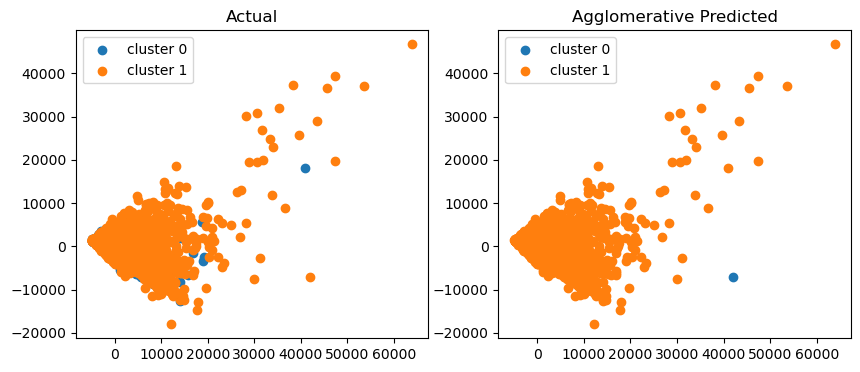

In [10]:
###################begin code for Task 2-b: Visualize the predicted training labels vs actual training labels - 10 Points

# Visualize the predicted training labels versus actual training labels. 
cluster = 2

def getsubplotObjects(col,row,size):
    fig1, ax = plt.subplots(col, row, figsize=size)
    return fig,ax
    
fig,ax  = getsubplotObjects(1,2,(10,4))


bestModelKeys = ['average','manhattan']

model = AgglomerativeClustering(n_clusters = 2,linkage=bestModelKeys[0],affinity=bestModelKeys[1])
y_pred = model.fit_predict(X_train)

y_pred_neg = np.where(y_pred == 0,1,0)



clusterPlotter(2,y_train,X_train_pca,fig,ax,y_pred_neg,'0',"Agglomerative","")

###################end code for Task 2-b

# TASK 3:  Compare K-Means Clustering and Hierarchical Agglomerative Clustering

--> Task 3-1 Visualize Clusters :- In this task, use whole dataset for training k-means cluster and hierarchical agglomerative clustering. Use the best model for agglomerative clustering. 

--> Visualize the predicted labels from k-means clustering and agglomerative clustering versus actual labels. Basically, you need to plot three scatter plots as subplots. Use number cluster = 2 for below example

/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/home/anjalip/anaconda3/envs/universe/lib/python3.8/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


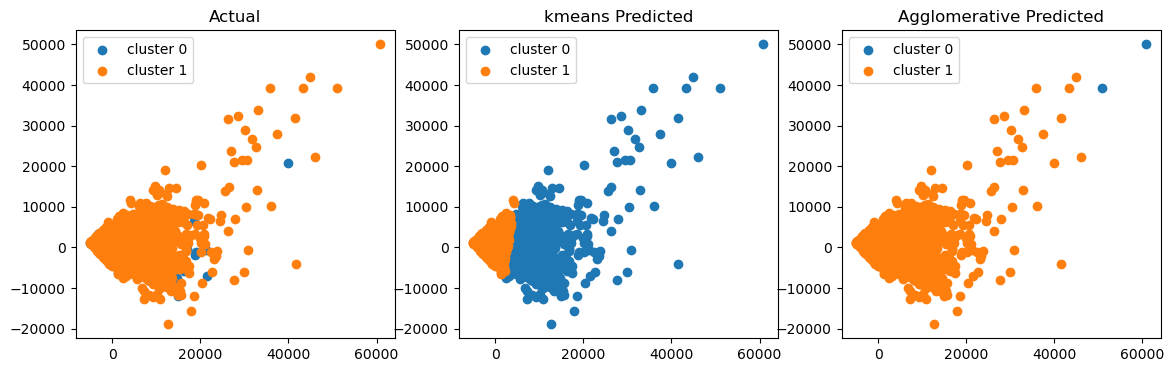

In [11]:
#####Task 3-1: Visualize the predicted training labels vs actual training labels - 10 Points

### Kmeans Clustering
# Model and fit the data to the Kmeans (use fit_predict : Performs clustering on X and returns cluster labels.)

Y_PRED = {}
Y_PRED_NEG = {}


model = KMeans(n_clusters=cluster)
Y_PRED["kmeans"] = model.fit_predict(data.iloc[:, 1:-1])
Y_PRED_NEG["kmeans"] = np.where(Y_PRED["kmeans"] ==0,1,0)

### Agglomerative Clustering
# Calculate pairwise distance matrix for X
pairDistance = pairwise_distances(data.iloc[:, 1:-1], metric='manhattan')

# Model and fit the data to the Agglomerative (use fit_predict : Performs clustering on X and returns cluster labels.)
pred_complete_manhattan = MODEL[bestModelKeys[0]][bestModelKeys[1]].fit_predict(data.iloc[:, 1:-1])


### Visualize Clusters
#  Model and fit the data to the PCA model

def getPCA(n,x):
    pca = PCA(n_components=2)
    return pca.fit_transform(x)


X_pca = getPCA(2,data.iloc[:, 1:-1])

# Visualize the predicted Kmeans labels versus  the predicted Agglomerative labels versus Actual labels. 

cluster = 2
fig1, ax1 = getsubplotObjects(1,3, (14,4)) 

model = AgglomerativeClustering(linkage=bestModelKeys[0],n_clusters = 2,affinity=bestModelKeys[1])
Y_PRED["AC"]  = model.fit_predict(data.iloc[:, 1:-1])
Y_PRED_NEG["AC"] = np.where(Y_PRED["AC"] ==0,1,0)



clusterPlotter(2,y,X_pca,fig1,ax1,Y_PRED["kmeans"],Y_PRED_NEG["AC"],"kmeans","Agglomerative")



######end Task 3-1

## Task 3-b: Compare K-Means Clustering &  Hierarchical Agglomerative Clustering

Print out 2D confusion matrices for kmeans and agglomerative clustering. Also, compare precision, recall, and F1-score for both model in at least 3-4 lines. Type your reasoning.

Kmeans Confusion Matrix
------------------------
|   | 0     |   1      |
------------------------
|0  | 173  |   1117    |
-----------------------
|1  | 1666  |   5680    |
-----------------------
Agglomerative Confusion Matrix
------------------------
|   | 0     |   1      |
------------------------
|0  | 1290  |   0    |
-----------------------
|1  | 7344  |   2    |
-----------------------


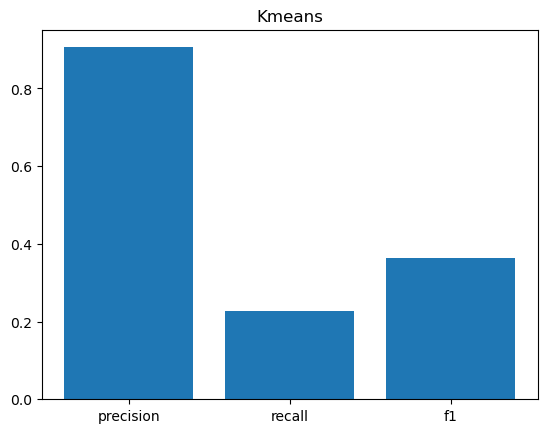

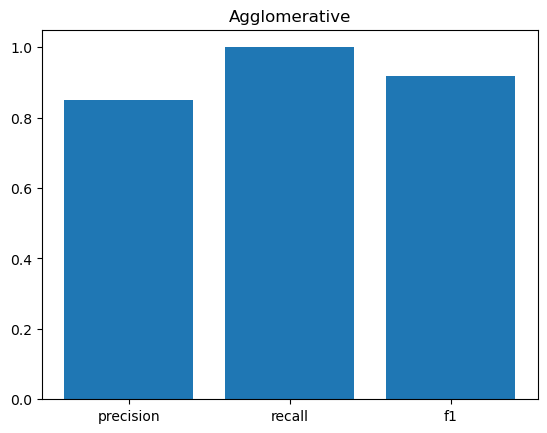

In [12]:
######Task 3-b  - 10 Points
 

def confMatrixPrinter(true,pr,title):
    kk = confusion_matrix(true, pr)
    
    print(title)
    print(f'------------------------')
    print(f'|   | 0     |   1      |')
    print(f'------------------------')
    
    
    count  = 0
    for k1,k2 in kk:
        print (f'|{count}  | {k1}  |   {k2}    |')
        print(f'-----------------------')
        count = count +1 
    
confMatrixPrinter(y,Y_PRED["kmeans"],"Kmeans Confusion Matrix")
confMatrixPrinter(y,Y_PRED["AC"],"Agglomerative Confusion Matrix")

from sklearn.metrics import f1_score,precision_score,recall_score

def Metrics(true,pd,title):
    precision = precision_score(true,pd)
    recall = recall_score(true,pd)
    f1 = f1_score(true,pd)
    
    plt.bar(['precision','recall','f1'],[precision,recall,f1])
    plt.title(title)
    plt.show()

Metrics(y,Y_PRED_NEG["kmeans"],"Kmeans")
Metrics(y,Y_PRED_NEG["AC"],"Agglomerative")


######end Task 3-b

# Inference

Based on the observation Agglomerative model performs better on all metrics . Since the Agglomerative clustering model takes into account the hierarchy of the model, we are getting better results for the taken dataset compared to the other methods. Further we have also observed that the given model is optimised when we use linkage as average and the metric as manhattan